<hr>
    <hr>
<b> Task 6: PREDICTION USING DECISION TREE ALGORITHM    
    <hr>
<hr>

#### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Dataset

In [2]:
ds = pd.read_csv("Iris.csv")
ds.head(2)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


- Shape of Dataset 👇

In [3]:
ds.shape

(150, 6)

- Columns in dataset 👇

In [4]:
ds.columns

Index(['Id', 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
       'Species'],
      dtype='object')

- Summary of datset 👇

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           150 non-null    int64  
 1   SepalLength  150 non-null    float64
 2   SepalWidth   150 non-null    float64
 3   PetalLength  150 non-null    float64
 4   PetalWidth   150 non-null    float64
 5   Species      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- Statistical summary of dataset 👇

In [6]:
ds.describe()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


- Null value check 👇

In [7]:
ds.isnull().sum()

Id             0
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [8]:
ds['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

- Pie plot for overall types of Iris Classification 👇

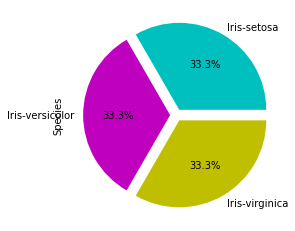

In [9]:
cols = ['c','m','y']
ds["Species"].value_counts().plot(kind ='pie',
                                  labels = ds["Species"].unique(),
                                  colors = cols,
                                  autopct = '%1.1f%%',
                                  explode = [.07,.07,.07])

plt.show()

#### Correlation Matrix

In [10]:
ds.corr('kendall').round(3)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth
Id,1.000,0.525,-0.273,0.645,0.680
SepalLength,0.525,1.000,-0.072,0.718,0.655
SepalWidth,-0.273,-0.072,1.000,-0.182,-0.147
PetalLength,0.645,0.718,-0.182,1.000,0.803
PetalWidth,0.680,0.655,-0.147,0.803,1.000


#### Correlation Graph

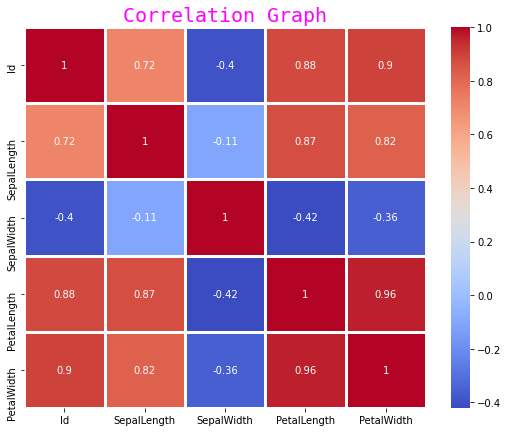

In [11]:
plt.figure(figsize = (9,7))

'''Font for title'''
font = {'family':'monospace',
        'color':'Magenta',
        'size':20}
sns.heatmap(ds.corr(),
            cmap='coolwarm',
            robust=True,
            annot=True,
            linewidths=3)
plt.title("Correlation Graph",fontdict=font)
plt.show()


- Independent and Dependent variables👇

In [12]:
features = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
X = ds.loc[:, features].values  
y = ds.Species

### Training the Model

In [13]:
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.3,random_state = 0)
des_tree = DecisionTreeClassifier()
des_tree.fit(X_train,y_train)

DecisionTreeClassifier()

#### Visualising the Tree

[Text(267.84000000000003, 489.24, 'PetalLength <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]\nclass = Iris-virginica'),
 Text(200.88000000000002, 380.52000000000004, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(334.80000000000007, 380.52000000000004, 'PetalLength <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]\nclass = Iris-virginica'),
 Text(133.92000000000002, 271.8, 'PetalWidth <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = Iris-versicolor'),
 Text(66.96000000000001, 163.08000000000004, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Iris-versicolor'),
 Text(200.88000000000002, 163.08000000000004, 'SepalWidth <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(133.92000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(267.84000000000003, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-v

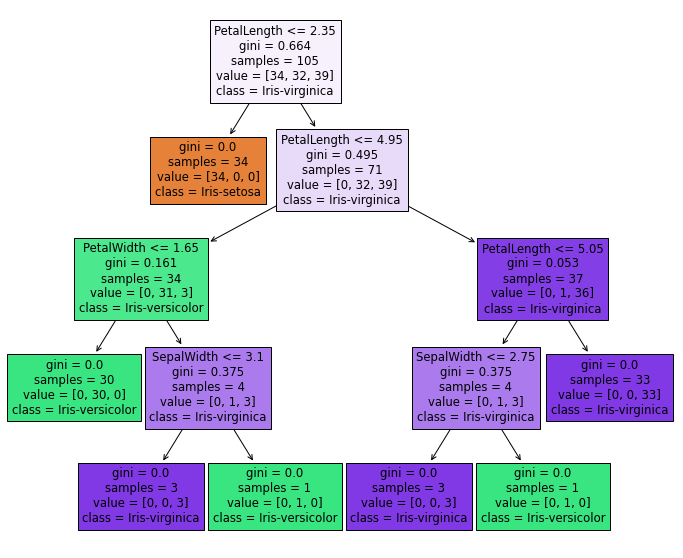

In [14]:
import sklearn.tree as tree
f_name = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
c_name = ds.Species.unique()

plt.figure(figsize = (12,10))
tree.plot_tree(des_tree,filled =True,feature_names = f_name,class_names = c_name)

- Accuracy 👇:

In [15]:
print("Accuracy : ",metrics.accuracy_score(y_test,des_tree.predict(X_test))*100)

Accuracy :  97.77777777777777


In [16]:
print(metrics.classification_report(y_test,des_tree.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [17]:
print(metrics.confusion_matrix(y_test,des_tree.predict(X_test)))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
